In [1]:
#Importing necessary packages
import tensorflow as tf
import keras as ks
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing the dataset 
ds_train=ks.utils.image_dataset_from_directory('dataset',
                                               image_size=(128,128),
                                               shuffle=True,
                                               labels='inferred',
                                               label_mode='int',
                                               seed=10,
                                               validation_split=0.2,
                                               subset='training',
                                               batch_size=32)
ds_test=ks.utils.image_dataset_from_directory('dataset',
                                              image_size=(128,128)
                                              ,shuffle=True,
                                              labels='inferred',
                                              label_mode='int',
                                              seed=10,
                                              validation_split=0.2,     
                                              subset='validation',
                                              batch_size=32)
class_names = ds_train.class_names
class_names

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


['Bear',
 'Bird',
 'Cat',
 'Cow',
 'Deer',
 'Dog',
 'Dolphin',
 'Elephant',
 'Giraffe',
 'Horse',
 'Kangaroo',
 'Lion',
 'Panda',
 'Tiger',
 'Zebra']

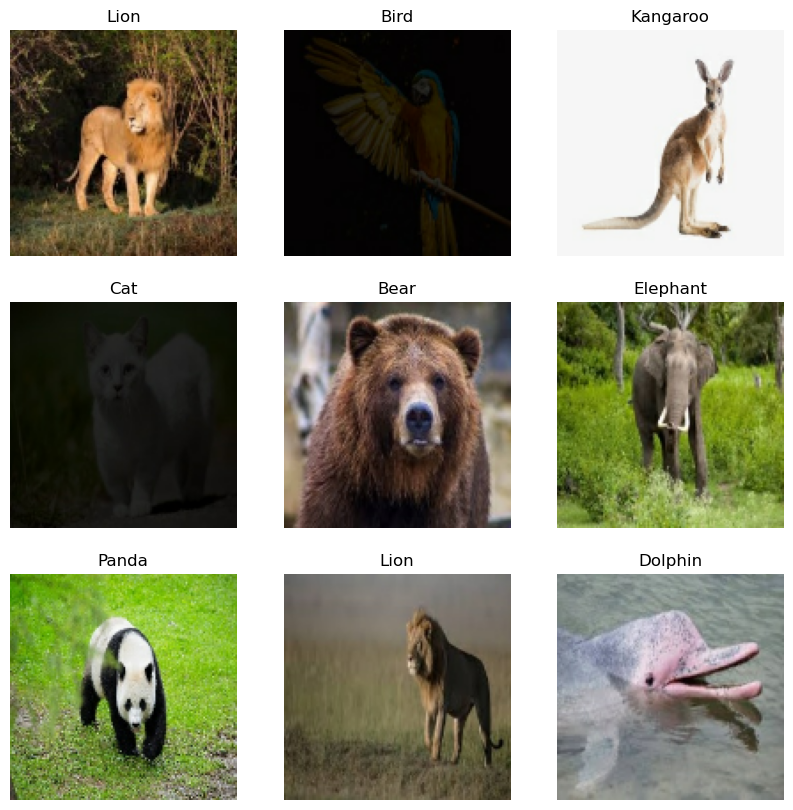

In [19]:
#Seeing the dataset
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
#Creating a convolutional network model
model=ks.Sequential([
    ks.layers.InputLayer(shape=(128,128,3)),
    ks.layers.RandomBrightness(0.4),
    ks.layers.Rescaling(1./255),
    ks.layers.Conv2D(64,(3,3),activation='relu'),
    ks.layers.MaxPool2D((2,2)),
    ks.layers.Conv2D(64,(3,3),activation='relu'),
    ks.layers.Flatten(),
    ks.layers.Dense(128,activation='relu'),
    ks.layers.Dense(15)])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_brightness               │ (None, 128, 128, 3)    │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,523,215 (116.44 MB)

 Trainable params: 30,523,215 (116.44 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Compile the model
model.compile(optimizer=ks.optimizers.Adam(learning_rate=0.001),
        loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

#Train model
trained_model_attributes=model.fit(ds_train,validation_data=ds_test,epochs=20)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 355ms/step - accuracy: 0.1041 - loss: 3.8886 - val_accuracy: 0.1289 - val_loss: 2.7173
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.2711 - loss: 2.3377 - val_accuracy: 0.4897 - val_loss: 2.0316
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - accuracy: 0.5589 - loss: 1.5580 - val_accuracy: 0.5309 - val_loss: 2.0427
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 294ms/step - accuracy: 0.7266 - loss: 1.0606 - val_accuracy: 0.6005 - val_loss: 2.1985
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.8303 - loss: 0.6278 - val_accuracy: 0.6701 - val_loss: 2.3877
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.8588 - loss: 0.5360 - val_accuracy: 0.6778 - val_loss: 2.2454
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8537 - loss: 0.5442 - val_accuracy: 0.6521 - val_loss: 2.3587
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.8720 - loss: 0.4949 - val_accu

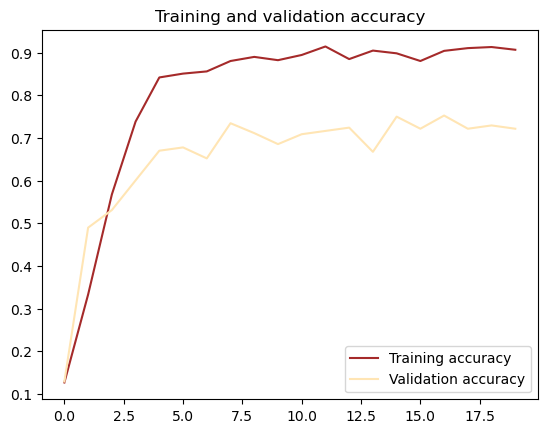

<Figure size 640x480 with 0 Axes>

In [23]:
acc = trained_model_attributes.history['accuracy']
val_acc = trained_model_attributes.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'brown' , label='Training accuracy')
plt.plot(epochs, val_acc, '#FFE5B4', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


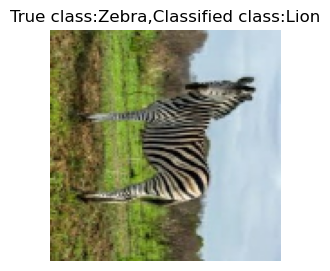

In [7]:
#Testing the trained model
i=12
x,y=tuple(zip(*ds_test))
l=x[0].numpy()
m=y[0].numpy()
t=model.predict(tf.convert_to_tensor(l))
x=(l[i].astype('uint8'))
plt.figure(figsize=(3,3))
plt.imshow(x)
plt.axis('off')
plt.title(f"True class:{class_names[m[i]]},Classified class:{class_names[np.argmax(t[i])]}")
plt.show()

In [8]:
# save the classification model as a .keras file

model.save('Model.keras')
print('Model Saved!')

Model Saved!


In [20]:
# load the classification model

new_model = tf.keras.models.load_model('Model.keras')
new_t=new_model.predict(tf.convert_to_tensor(l))
print(f"True class:{class_names[m[i]]} \nClassified class:{class_names[np.argmax(t[i])]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
True class:Giraffe 
Classified class:Giraffe
